<a href="https://colab.research.google.com/github/techman0256/T14_Data_Mining_CP1/blob/main/T14_DataMining_CP1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Team T14: Deep Miners

### Dataset: [CDC Nutrition Data](https://www.kaggle.com/datasets/spittman1248/cdc-data-nutrition-physical-activity-obesity)


### Team Members:

* Dhruv Shah - 202103017

* Pranav Patel - 202103040

* Arsh Jindal - 202103021

* Akshat Prasad - 202101419

* Sumukh Patel - 202101422

* Chinmay Vaishnav - 202101157




In [114]:
!mkdir data

mkdir: cannot create directory ‘data’: File exists


In [115]:
# Unzipping the data file.
!unzip /content/data/cp1_data.zip -d data/

Archive:  /content/data/cp1_data.zip
replace data/Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [116]:
# Importing the necessary libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [117]:
# Loading our dataset into a csv file using pandas.
dataset = pd.read_csv(os.path.join('/content/data', 'Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv'))
dataset.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


In [118]:
# Number of null values for each column in the dataset.
print(dataset.shape)
print(dataset.isnull().sum())

(53392, 33)
YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
Datasource                        0
Class                             0
Topic                             0
Question                          0
Data_Value_Unit               53392
Data_Value_Type                   0
Data_Value                     5046
Data_Value_Alt                 5046
Data_Value_Footnote_Symbol    48346
Data_Value_Footnote           48346
Low_Confidence_Limit           5046
High_Confidence_Limit          5046
Sample_Size                    5046
Total                         51485
Age(years)                    41954
Education                     45764
Gender                        49578
Income                        40043
Race/Ethnicity                38136
GeoLocation                    1008
ClassID                           0
TopicID                           0
QuestionID                        0
DataValueTypeID 

In [119]:
dataset.dtypes

YearStart                       int64
YearEnd                         int64
LocationAbbr                   object
LocationDesc                   object
Datasource                     object
Class                          object
Topic                          object
Question                       object
Data_Value_Unit               float64
Data_Value_Type                object
Data_Value                    float64
Data_Value_Alt                float64
Data_Value_Footnote_Symbol     object
Data_Value_Footnote            object
Low_Confidence_Limit          float64
High_Confidence_Limit         float64
Sample_Size                   float64
Total                          object
Age(years)                     object
Education                      object
Gender                         object
Income                         object
Race/Ethnicity                 object
GeoLocation                    object
ClassID                        object
TopicID                        object
QuestionID  

In [120]:
dataset['Question'].unique()

array(['Percent of adults aged 18 years and older who have obesity',
       'Percent of adults aged 18 years and older who have an overweight classification',
       'Percent of adults who report consuming fruit less than one time daily',
       'Percent of adults who report consuming vegetables less than one time daily',
       'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
       'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
       'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity 

In [121]:
dataset['StratificationCategory1'].unique()

array(['Total', 'Gender', 'Education', 'Age (years)', 'Income',
       'Race/Ethnicity'], dtype=object)

In [122]:
dataset['LocationDesc'].unique()

array(['Alabama', 'National', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Connecticut', 'Colorado', 'Delaware', 'Florida',
       'District of Columbia', 'Georgia', 'Guam', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'West Virginia', 'Washington', 'Wisconsin', 'Wyoming',
       'Virgin Islands'], dtype=object)

## Data Cleaning

* YearStart and YearEnd have no null values but they have same value So we can drop any of the column

* Drop Data_Value_Alt, Data_Value_Unit

* Drop LocationAbbr due to redunduncy

* Drop Datasource(all same), Data_Value_Unit(all blank), Data_value_type(all same)

* Class and Topic are same

* Drop GeoLocation

In [123]:
dataset = dataset.drop(['YearEnd', 'Data_Value_Alt', 'Data_Value_Unit', 'Data_Value_Type', 'LocationAbbr', 'Datasource', 'Topic', 'TopicID', 'GeoLocation', 'DataValueTypeID', 'Data_Value_Footnote', 'Data_Value_Footnote_Symbol'], axis=1)


In [124]:
dataset.head()

,YearStart,LocationDesc,Class,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),...,Gender,Income,Race/Ethnicity,ClassID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,Total,NaN,...,NaN,NaN,NaN,OWS,Q036,1,Total,Total,OVR,OVERALL
1,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,NaN,NaN,...,Male,NaN,NaN,OWS,Q036,1,Gender,Male,GEN,MALE
2,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,NaN,NaN,...,Female,NaN,NaN,OWS,Q036,1,Gender,Female,GEN,FEMALE
3,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,NaN,NaN,...,NaN,NaN,NaN,OWS,Q036,1,Education,Less than high school,EDU,EDUHS
4,2011,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,NaN,NaN,...,NaN,NaN,NaN,OWS,Q036,1,Education,High school graduate,EDU,EDUHSGRAD


In [125]:
dataset = dataset.dropna(subset=['Data_Value'])

In [126]:
print(dataset.columns)
dataset.isnull().sum()

Index(['YearStart', 'LocationDesc', 'Class', 'Question', 'Data_Value',
       'Low_Confidence_Limit', 'High_Confidence_Limit ', 'Sample_Size',
       'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'ClassID', 'QuestionID', 'LocationID',
       'StratificationCategory1', 'Stratification1',
       'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')


YearStart                        0
LocationDesc                     0
Class                            0
Question                         0
Data_Value                       0
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                      0
Total                        46439
Age(years)                   36908
Education                    40718
Gender                       44532
Income                       34997
Race/Ethnicity               38136
ClassID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
dtype: int64

## Perform EDA on the given dataset.

In [127]:
# Getting the instances which have the data of people classified as obese.
filtered_data1 = dataset[(dataset['Question'] == 'Percent of adults aged 18 years and older who have obesity')]

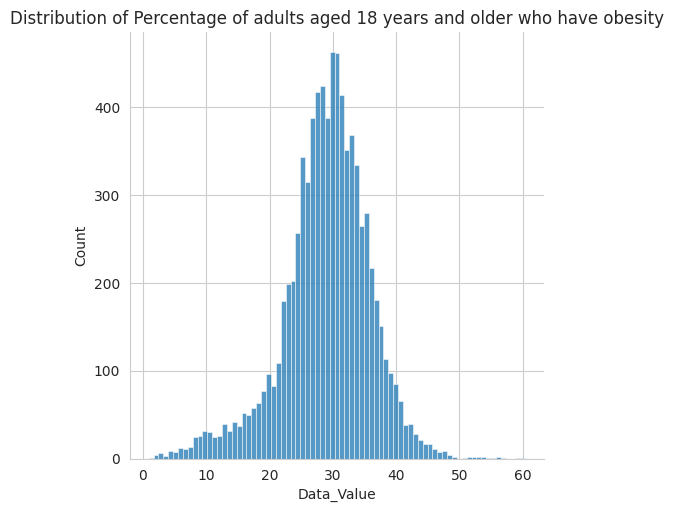

In [128]:
# Distribution of the Data_Values for People above the age of 18 who are obese.
# The plot shows that at in most of the surveys around 30% of people are obese.
sns.displot(data=filtered_data1, x='Data_Value').set(title='Distribution of Percentage of adults aged 18 years and older who have obesity')

[Text(0.5, 1.0, 'Percent of adults aged 18 years and older who have obesity in each state')]

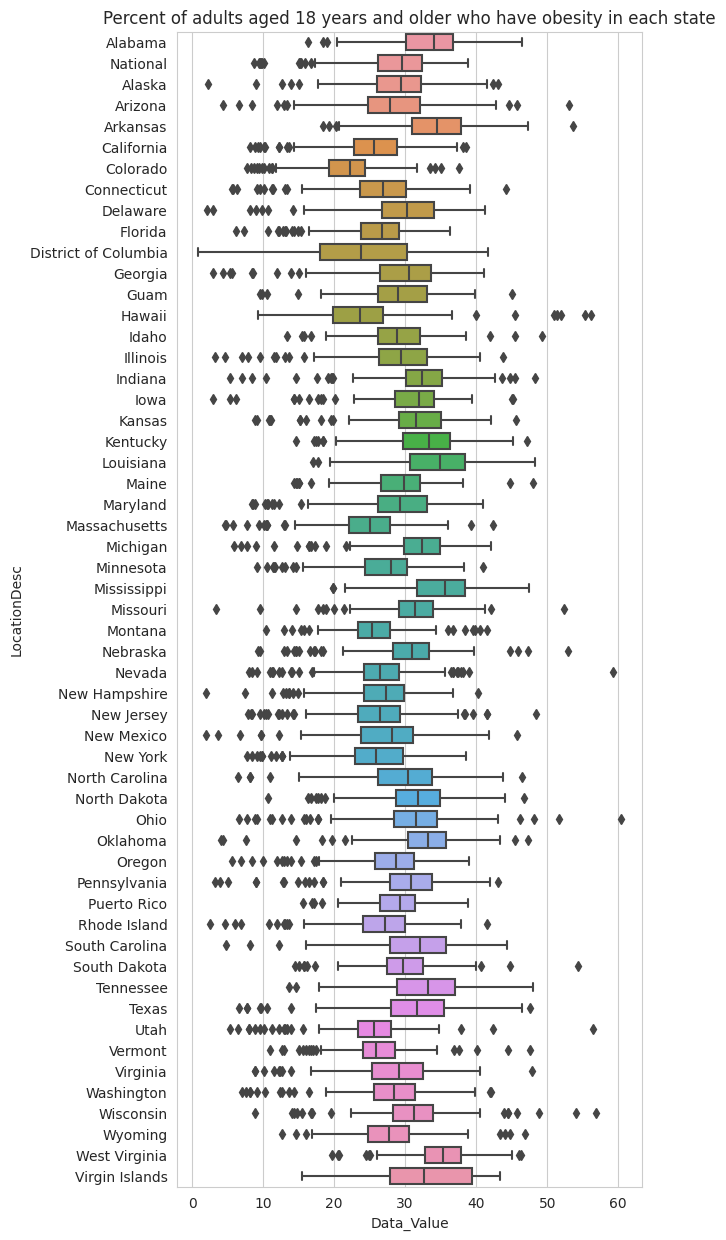

In [129]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data1, x='Data_Value', y='LocationDesc', ax=ax).set(title='Percent of adults aged 18 years and older who have obesity in each state')

<Axes: xlabel='StratificationID1', ylabel='Data_Value'>

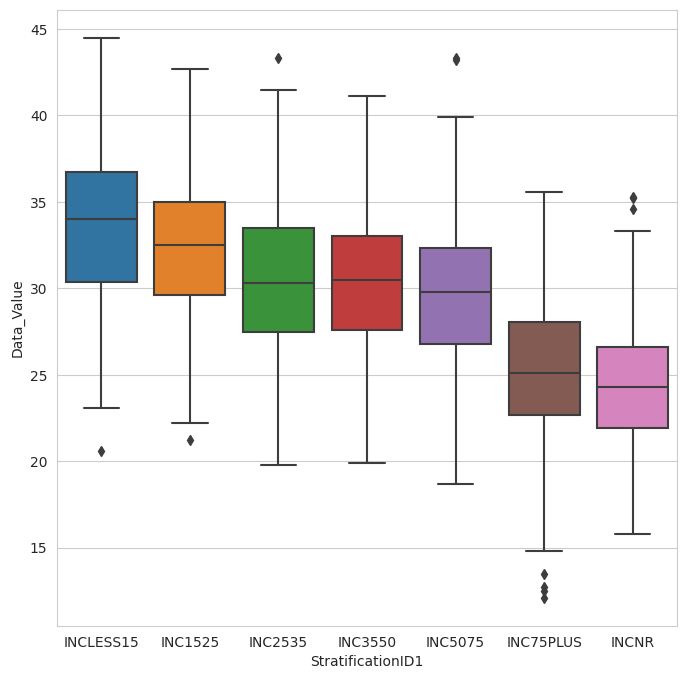

In [130]:
fig, ax = plt.subplots(figsize=(8, 8))
filtered_data1_stratified = dataset[(dataset['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (dataset['StratificationCategory1']=='Income')]
sns.boxplot(data=filtered_data1_stratified, x='StratificationID1', y='Data_Value', ax=ax)

<Axes: xlabel='StratificationID1', ylabel='Data_Value'>

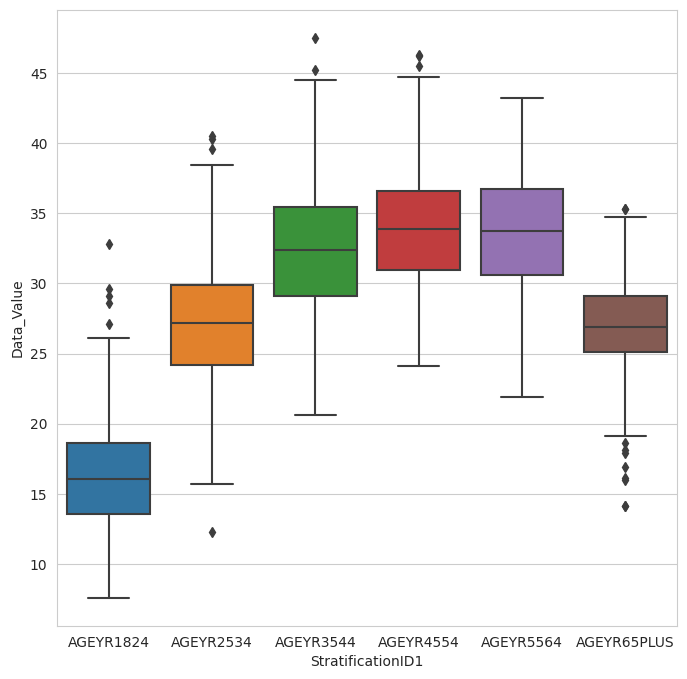

In [131]:
fig, ax = plt.subplots(figsize=(8, 8))
filtered_data1_age_strata = dataset[(dataset['Question'] == 'Percent of adults aged 18 years and older who have obesity') & (dataset['StratificationCategory1']=='Age (years)')]
sns.boxplot(data=filtered_data1_age_strata, x='StratificationID1', y='Data_Value', ax=ax)

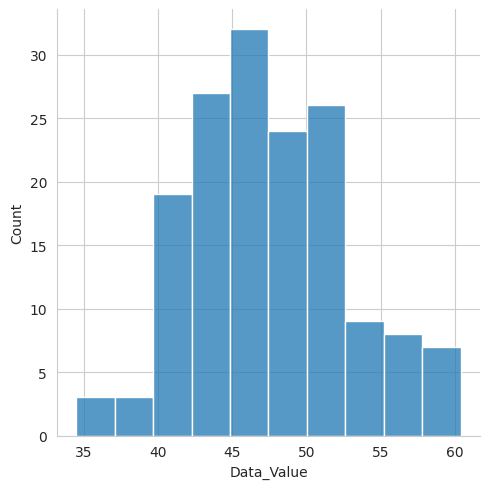

In [132]:
# Fruits and vegetables behaviour for People who fall in the stratification catergory of Income Less than $15K
filtered_data2 = dataset[(dataset['Question'] == 'Percent of adults who report consuming fruit less than one time daily') & (dataset['StratificationID1']=='INCLESS15')]
sns.displot(data=filtered_data2, x='Data_Value')

<Axes: xlabel='Data_Value', ylabel='LocationDesc'>

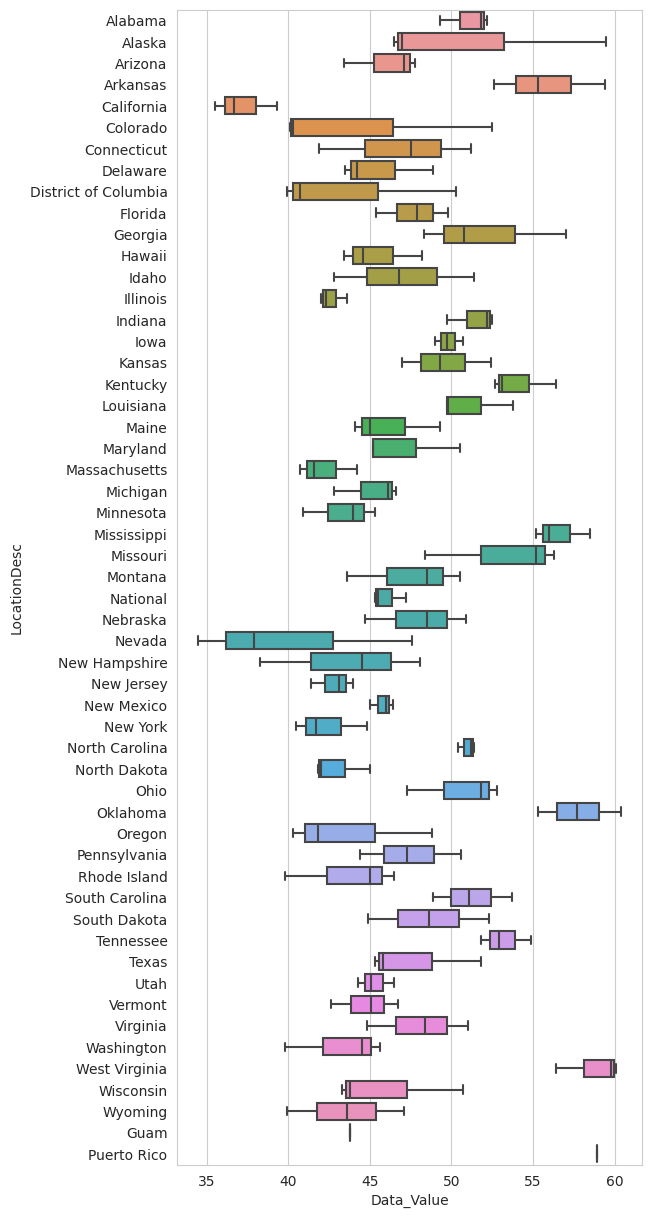

In [133]:
# State wise box plots, this depict the state wise fruits and vegetable behaviour of people with Income less than $15k.
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data2, x='Data_Value', y='LocationDesc', ax=ax)

<Axes: xlabel='Data_Value', ylabel='LocationDesc'>

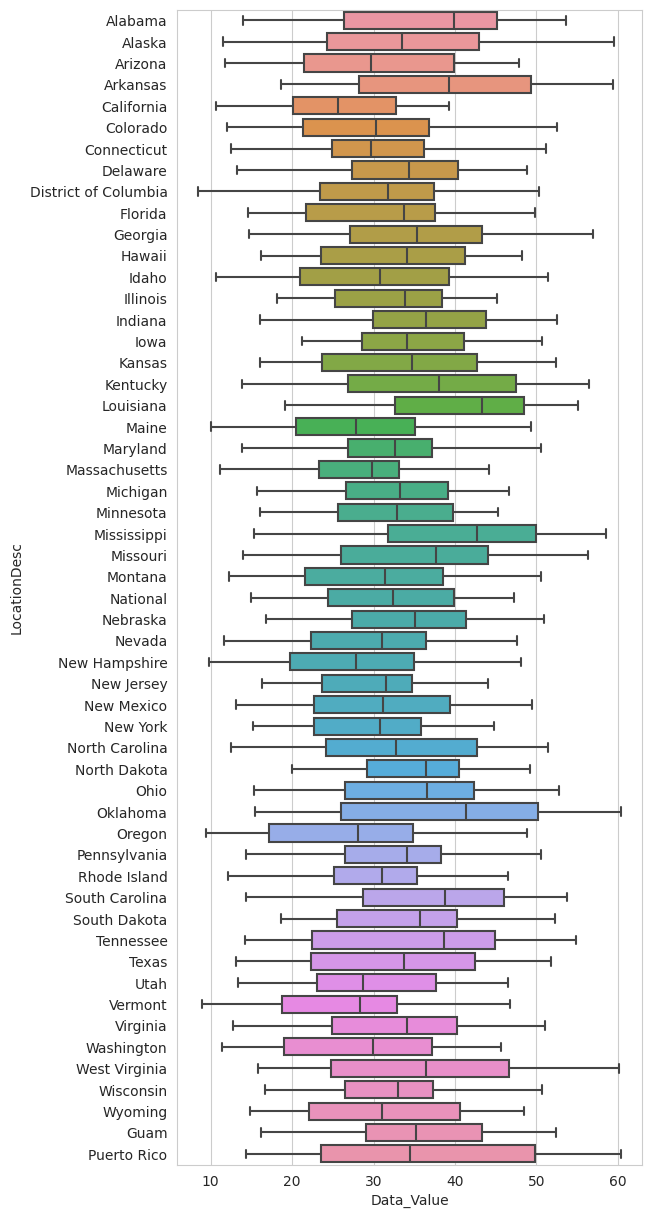

In [134]:
# Percentage of people with income less than $15k and report consuming low amount of fruits and vegetables.
filtered_data3 = dataset[(dataset['Question'] == 'Percent of adults who report consuming fruit less than one time daily') & (dataset['StratificationCategory1']=='Income')]
filtered_data4 = dataset[(dataset['Question'] == 'Percent of adults who report consuming vegetables less than one time daily') & (dataset['StratificationCategory1']=='Income')]

dataset_nutrition = pd.concat([filtered_data3,filtered_data4])
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=dataset_nutrition, x='Data_Value', y='LocationDesc', ax=ax)

<Axes: xlabel='StratificationID1', ylabel='Data_Value'>

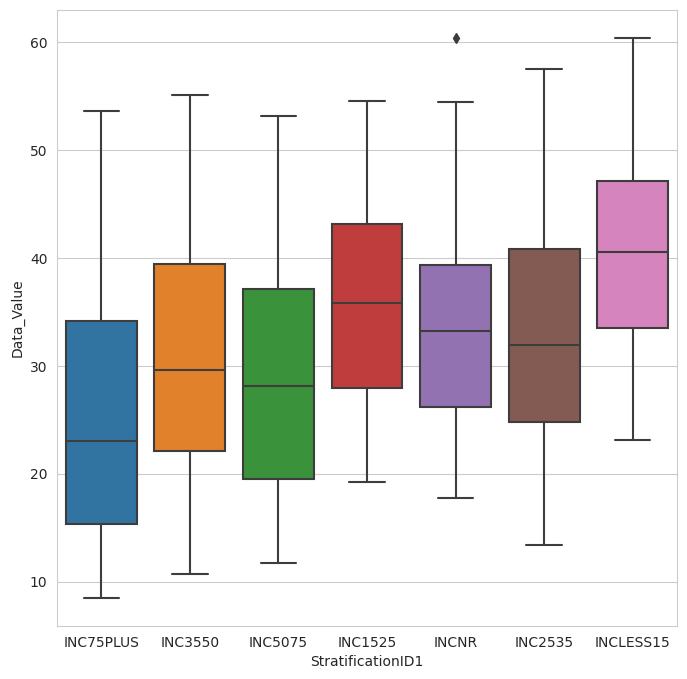

In [135]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.boxplot(data=dataset_nutrition, x='StratificationID1', y='Data_Value', ax=ax)

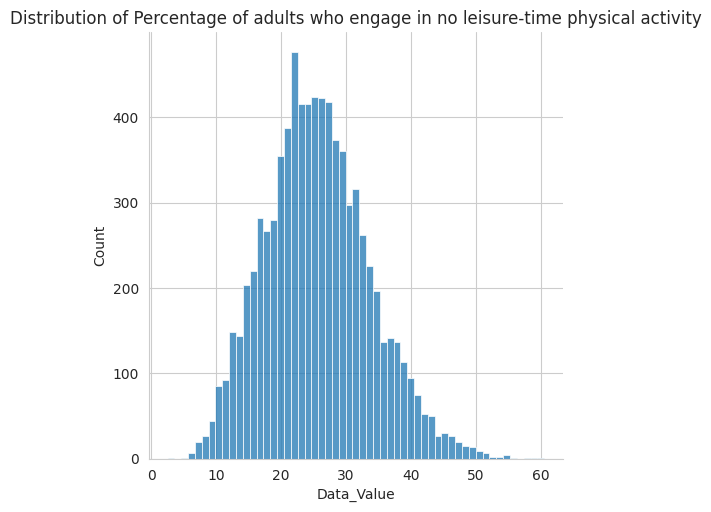

In [136]:
filtered_data5 = dataset[(dataset['Question'] == 'Percent of adults who engage in no leisure-time physical activity')]
sns.displot(data=filtered_data5, x='Data_Value').set(title='Distribution of Percentage of adults who engage in no leisure-time physical activity')

[Text(0.5, 1.0, 'Percent of adults who engage in no leisure-time physical activity')]

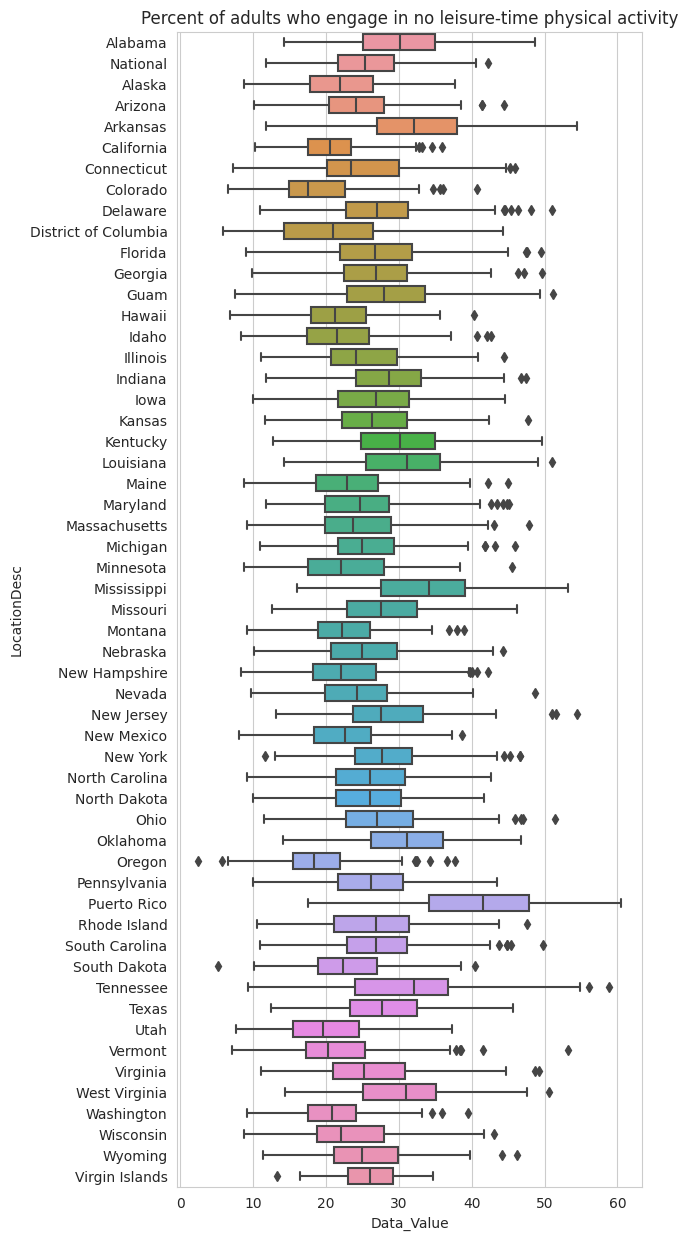

In [137]:
fig, ax = plt.subplots(figsize=(6, 15))
sns.boxplot(data=filtered_data5, x='Data_Value', y='LocationDesc', ax=ax).set(title='Percent of adults who engage in no leisure-time physical activity')

<Axes: xlabel='StratificationID1', ylabel='Data_Value'>

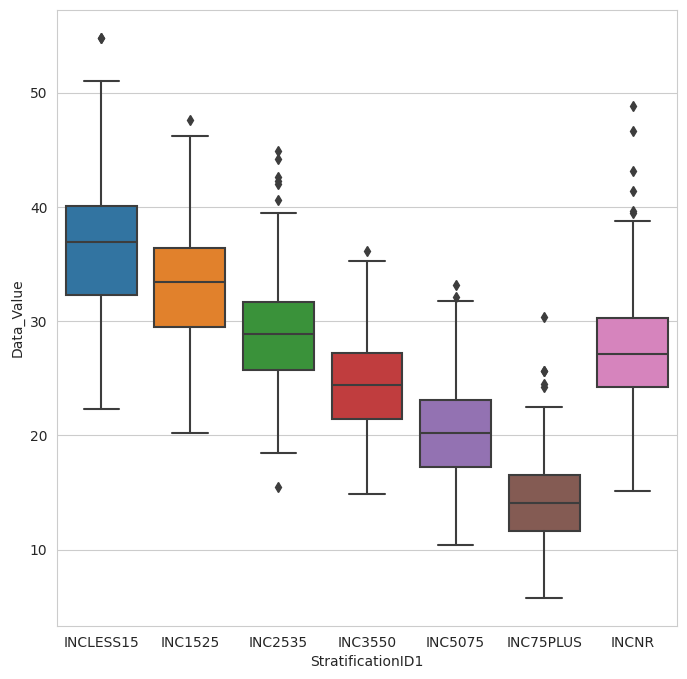

In [138]:
fig, ax = plt.subplots(figsize=(8, 8))
filtered_data5_stratified = dataset[(dataset['Question'] == 'Percent of adults who engage in no leisure-time physical activity') & (dataset['StratificationCategory1']=='Income')]
sns.boxplot(data=filtered_data5_stratified, x='StratificationID1', y='Data_Value', ax=ax)

### We will now analyse our data for each of the stratification ID


In [139]:
dataset['StratificationCategory1'].unique()

array(['Total', 'Gender', 'Education', 'Age (years)', 'Income',
       'Race/Ethnicity'], dtype=object)

In [140]:
# Making five dataframes
data1 = dataset[dataset['StratificationCategory1']=='Income']
data2 = dataset[dataset['StratificationCategory1']=='Gender']
data3 = dataset[dataset['StratificationCategory1']=='Age (years)']
data4 = dataset[dataset['StratificationCategory1']=='Education']
data5 = dataset[dataset['StratificationCategory1']=='Race/Ethnicity']
data6 = dataset[dataset['StratificationCategory1']=='Total']

<Axes: xlabel='Data_Value', ylabel='StratificationID1'>

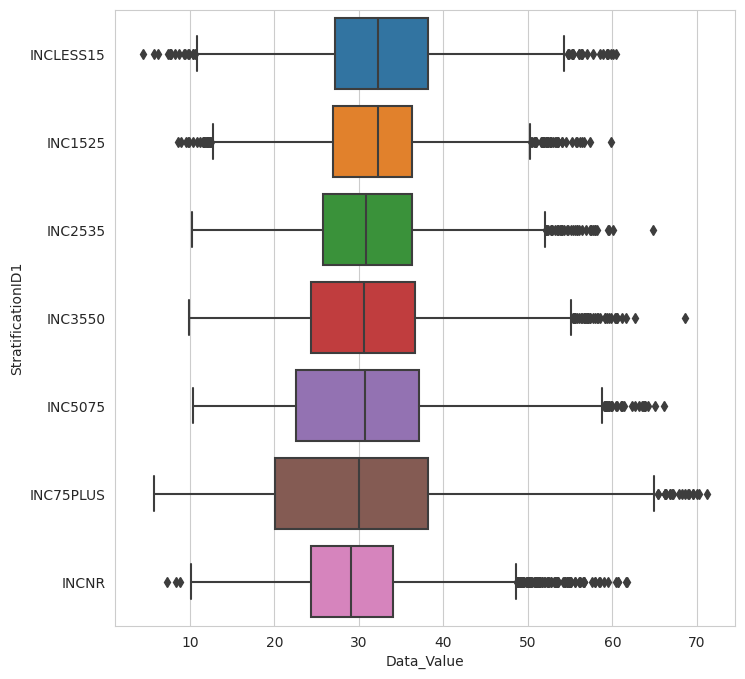

In [141]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data1, y='StratificationID1', x='Data_Value', ax=ax)

<Axes: xlabel='Data_Value', ylabel='StratificationID1'>

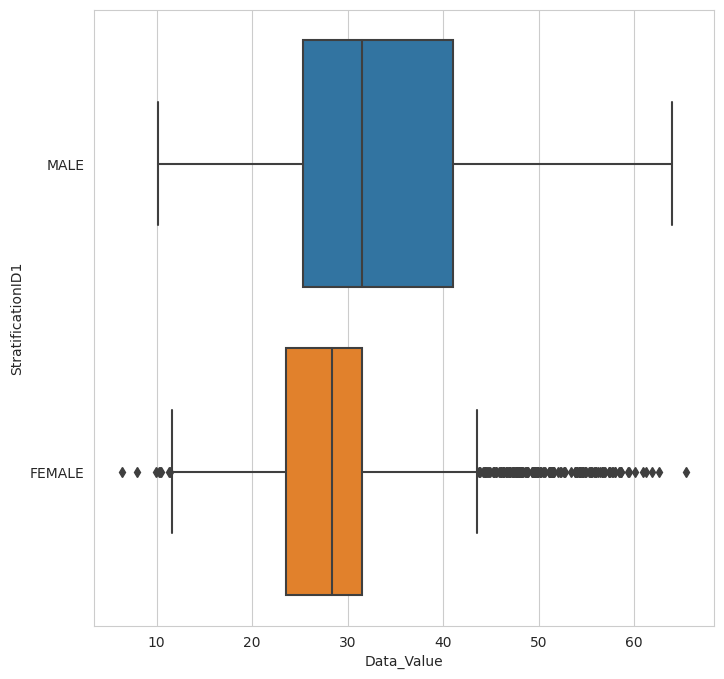

In [142]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data2, y='StratificationID1', x='Data_Value', ax=ax)

<Axes: xlabel='Data_Value', ylabel='Question'>

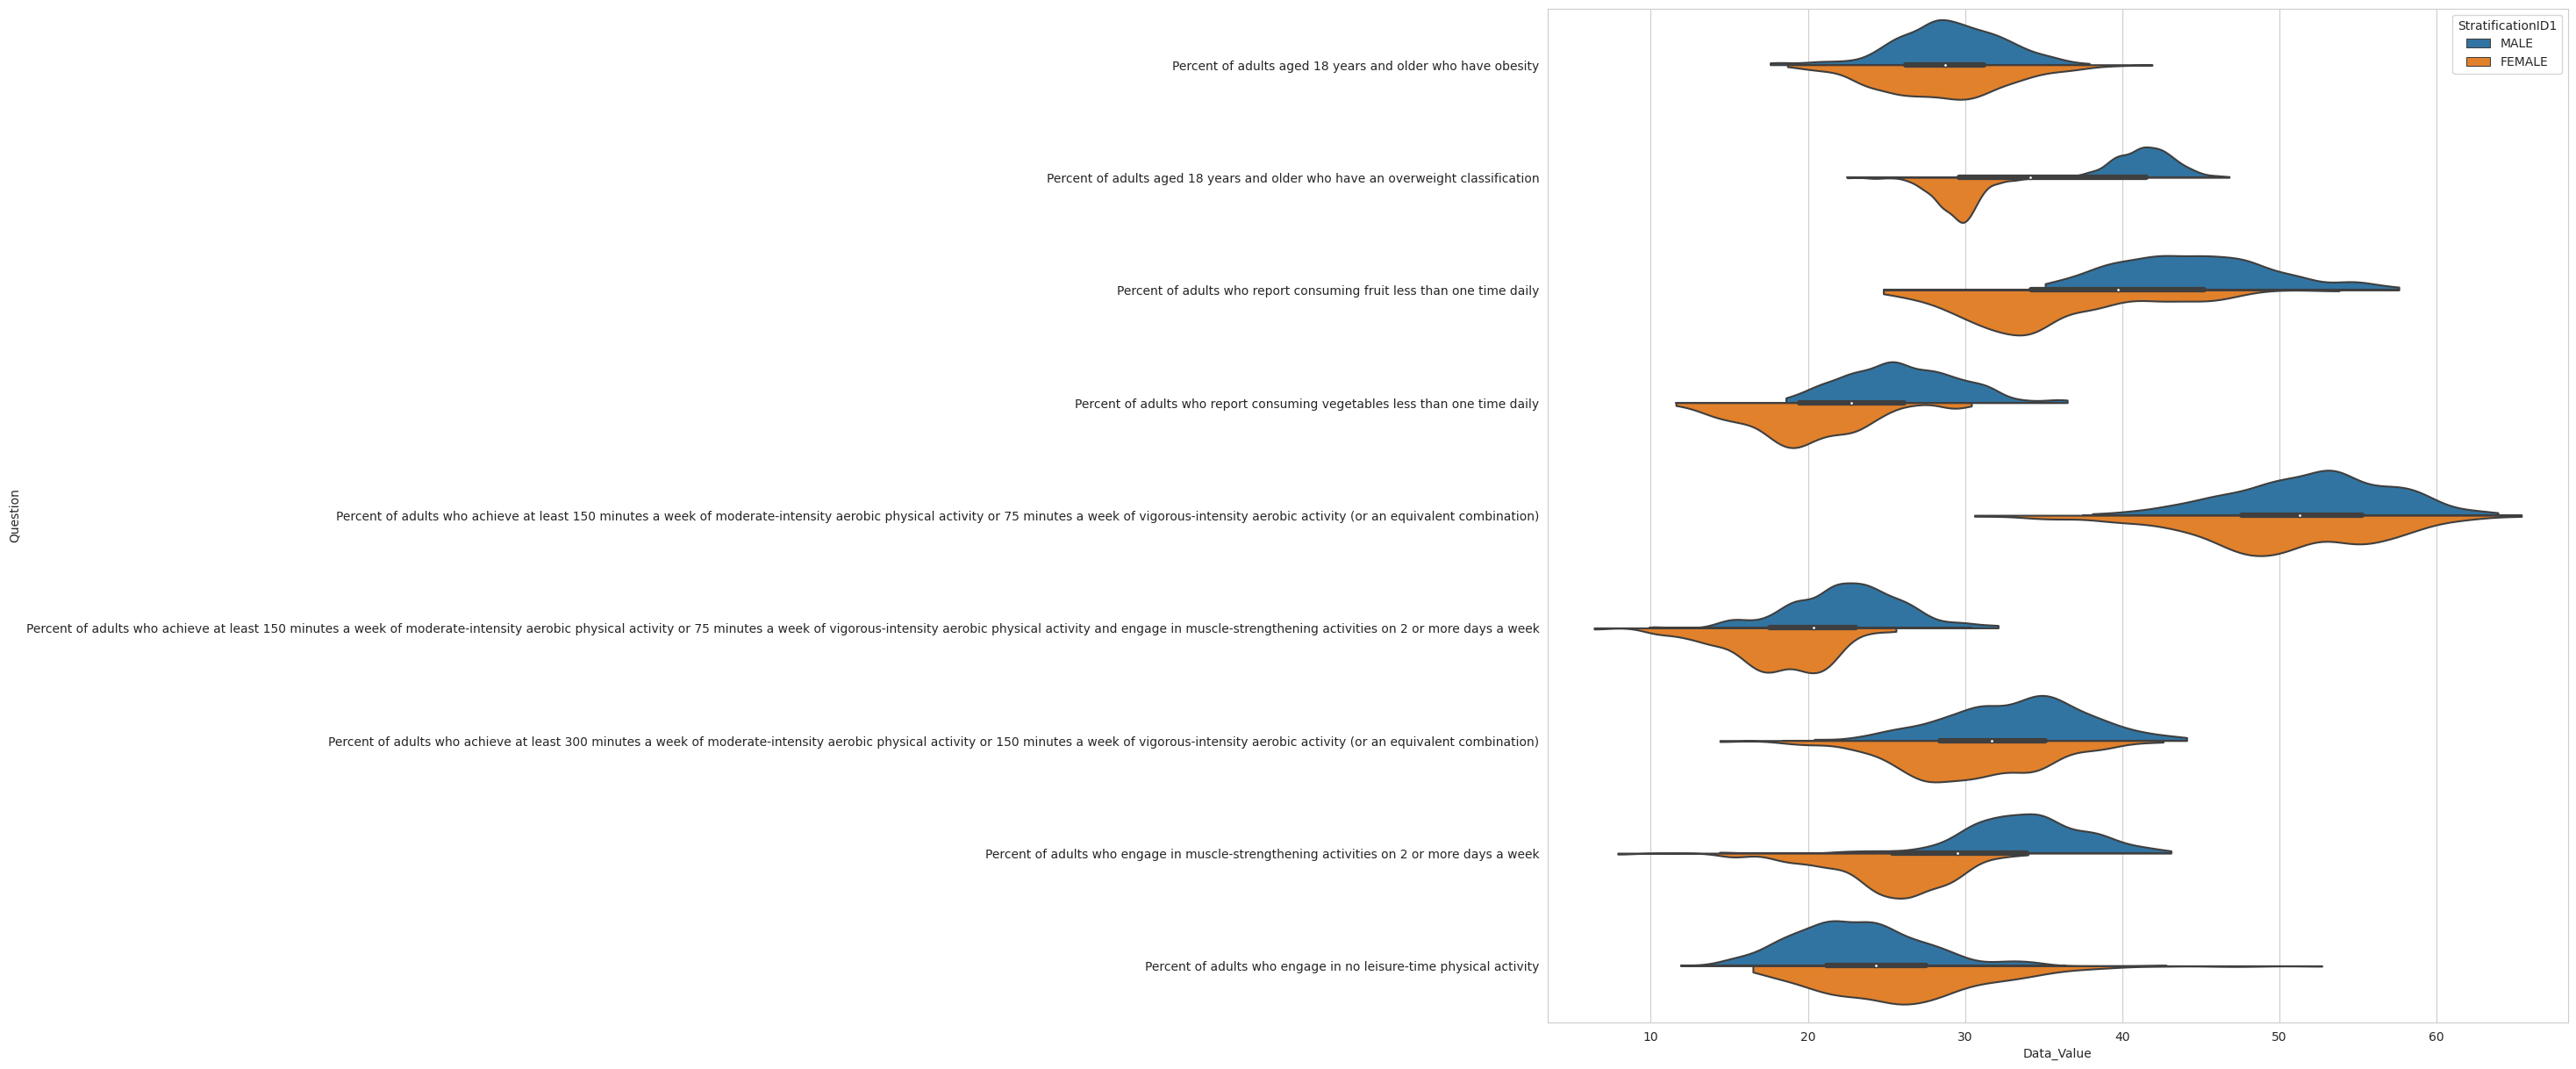

In [143]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.violinplot(data=data2, x='Data_Value', y='Question', hue='StratificationID1', bw=.25, cut=0, split=True, ax=ax)

<Axes: xlabel='Data_Value', ylabel='StratificationID1'>

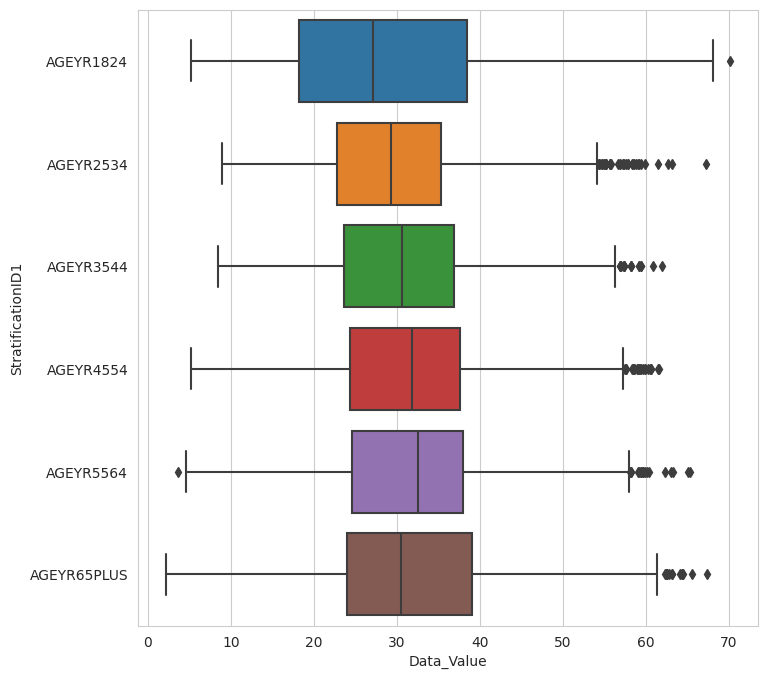

In [144]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data3, y='StratificationID1', x='Data_Value', ax=ax)

<Axes: xlabel='Data_Value', ylabel='Question'>

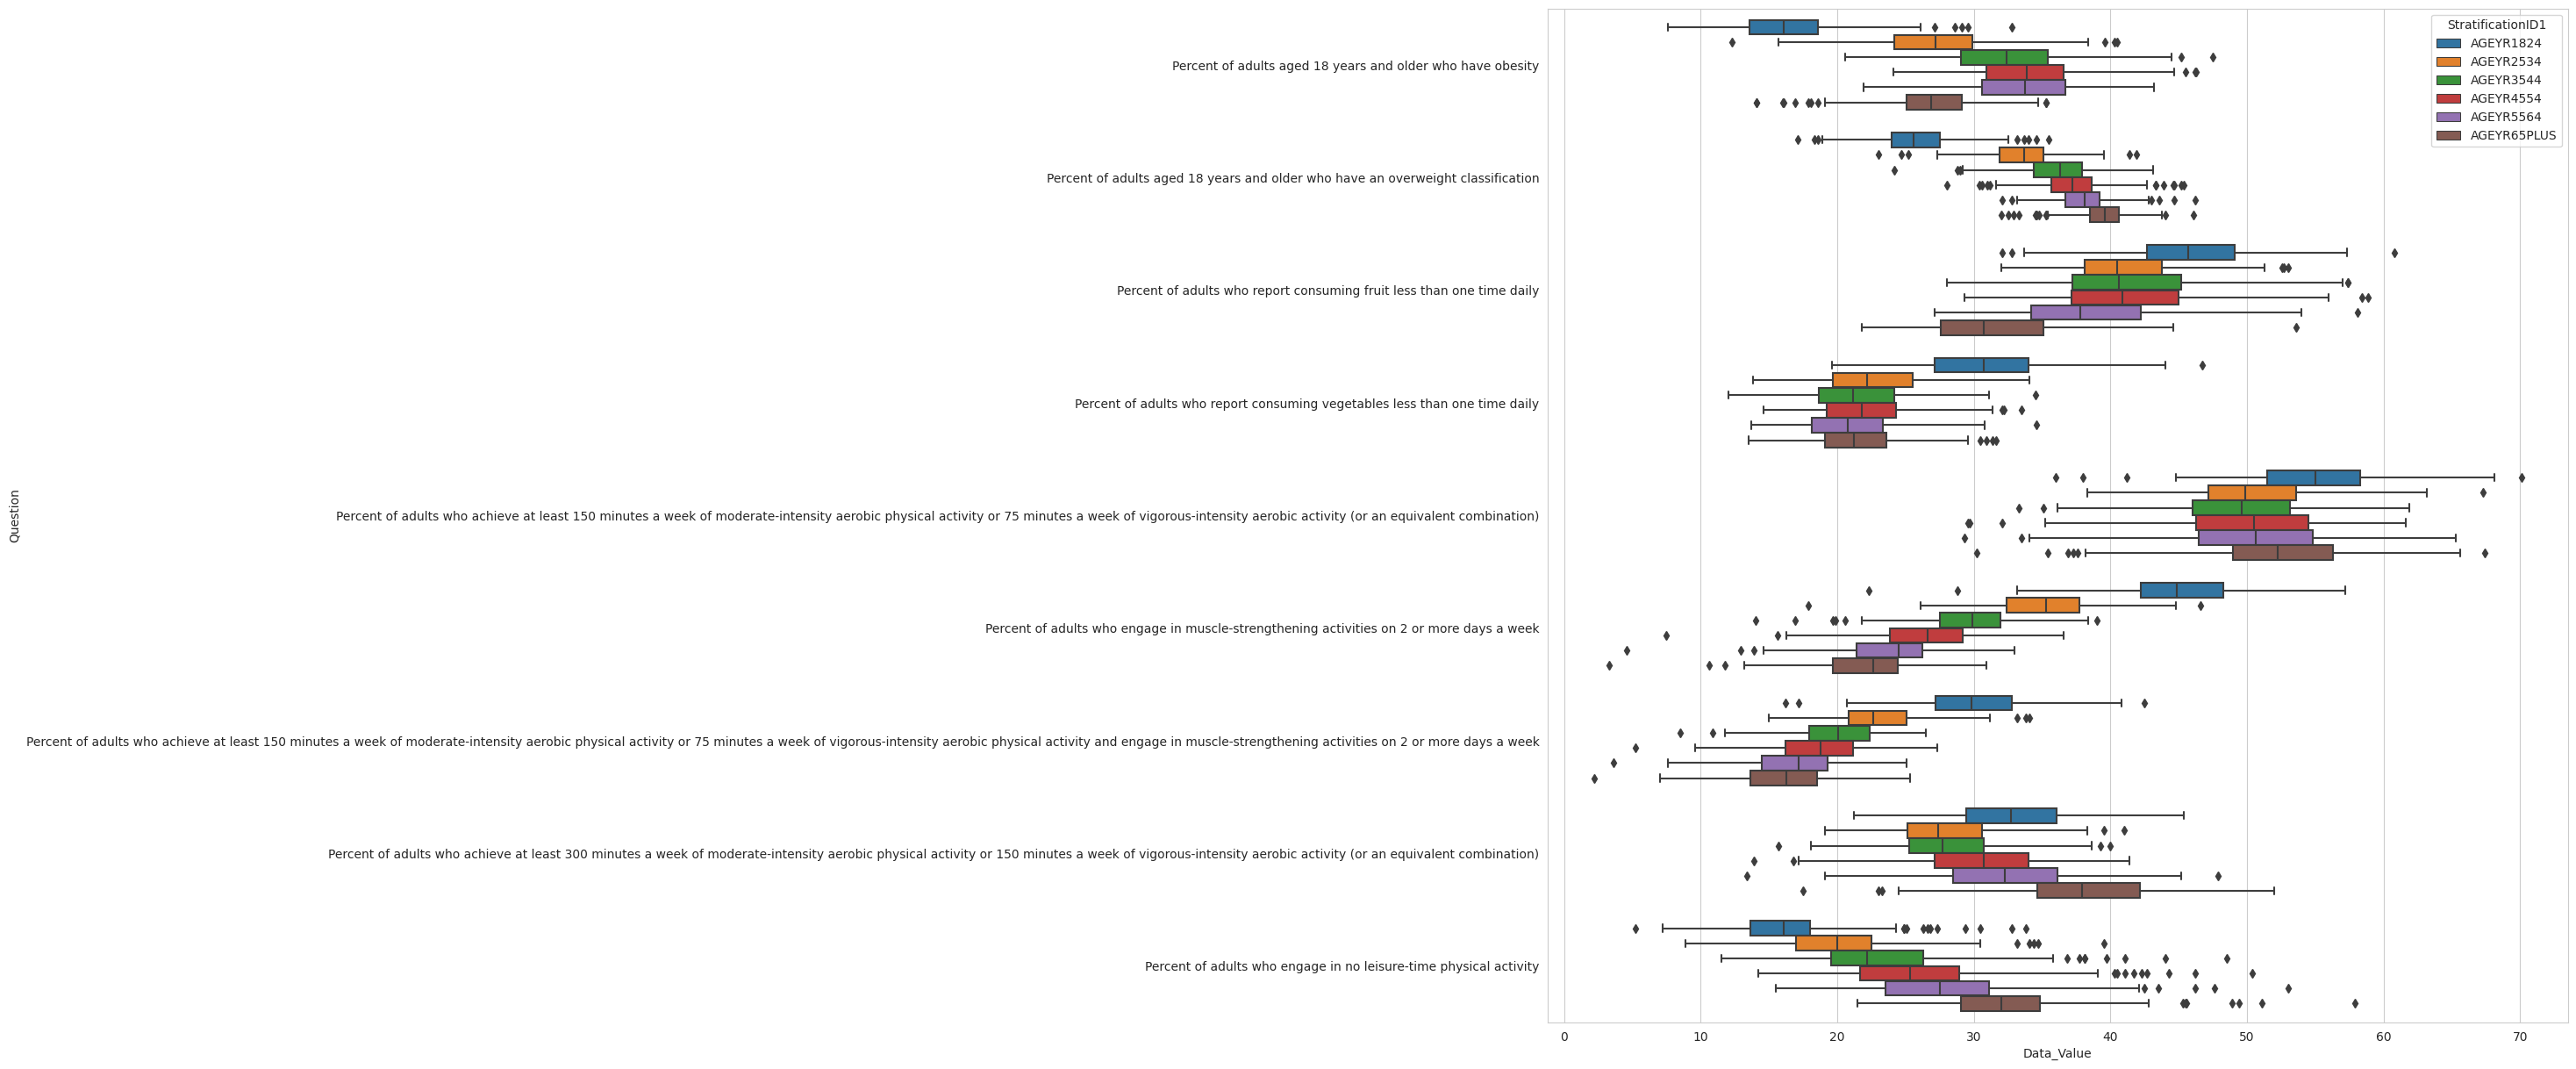

In [145]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=data3, x='Data_Value', y='Question', hue='StratificationID1', ax=ax)

<Axes: xlabel='Data_Value', ylabel='Stratification1'>

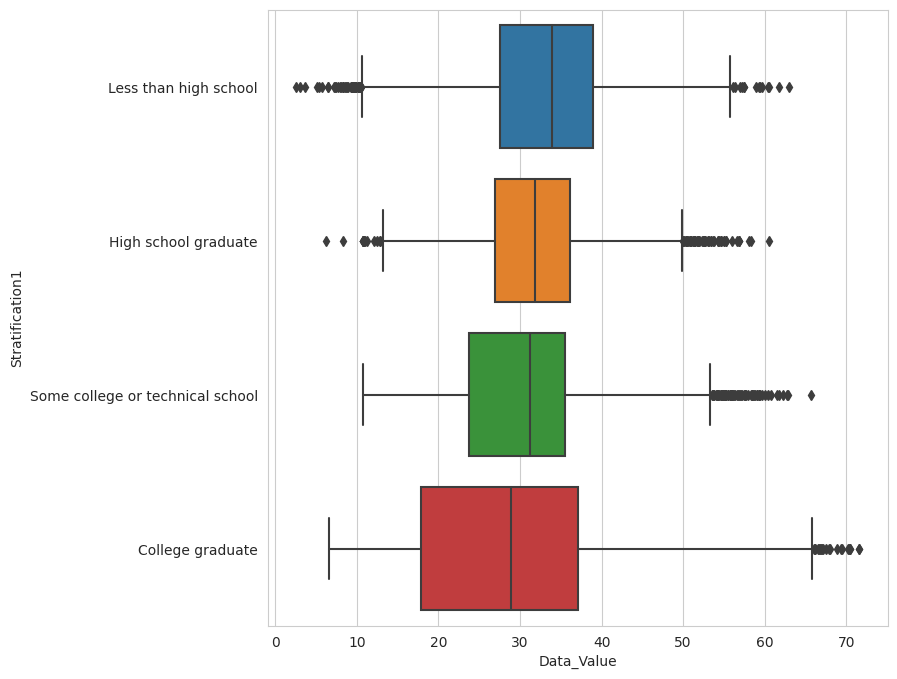

In [146]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data4, y='Stratification1', x='Data_Value', ax=ax)

<Axes: xlabel='Data_Value', ylabel='Question'>

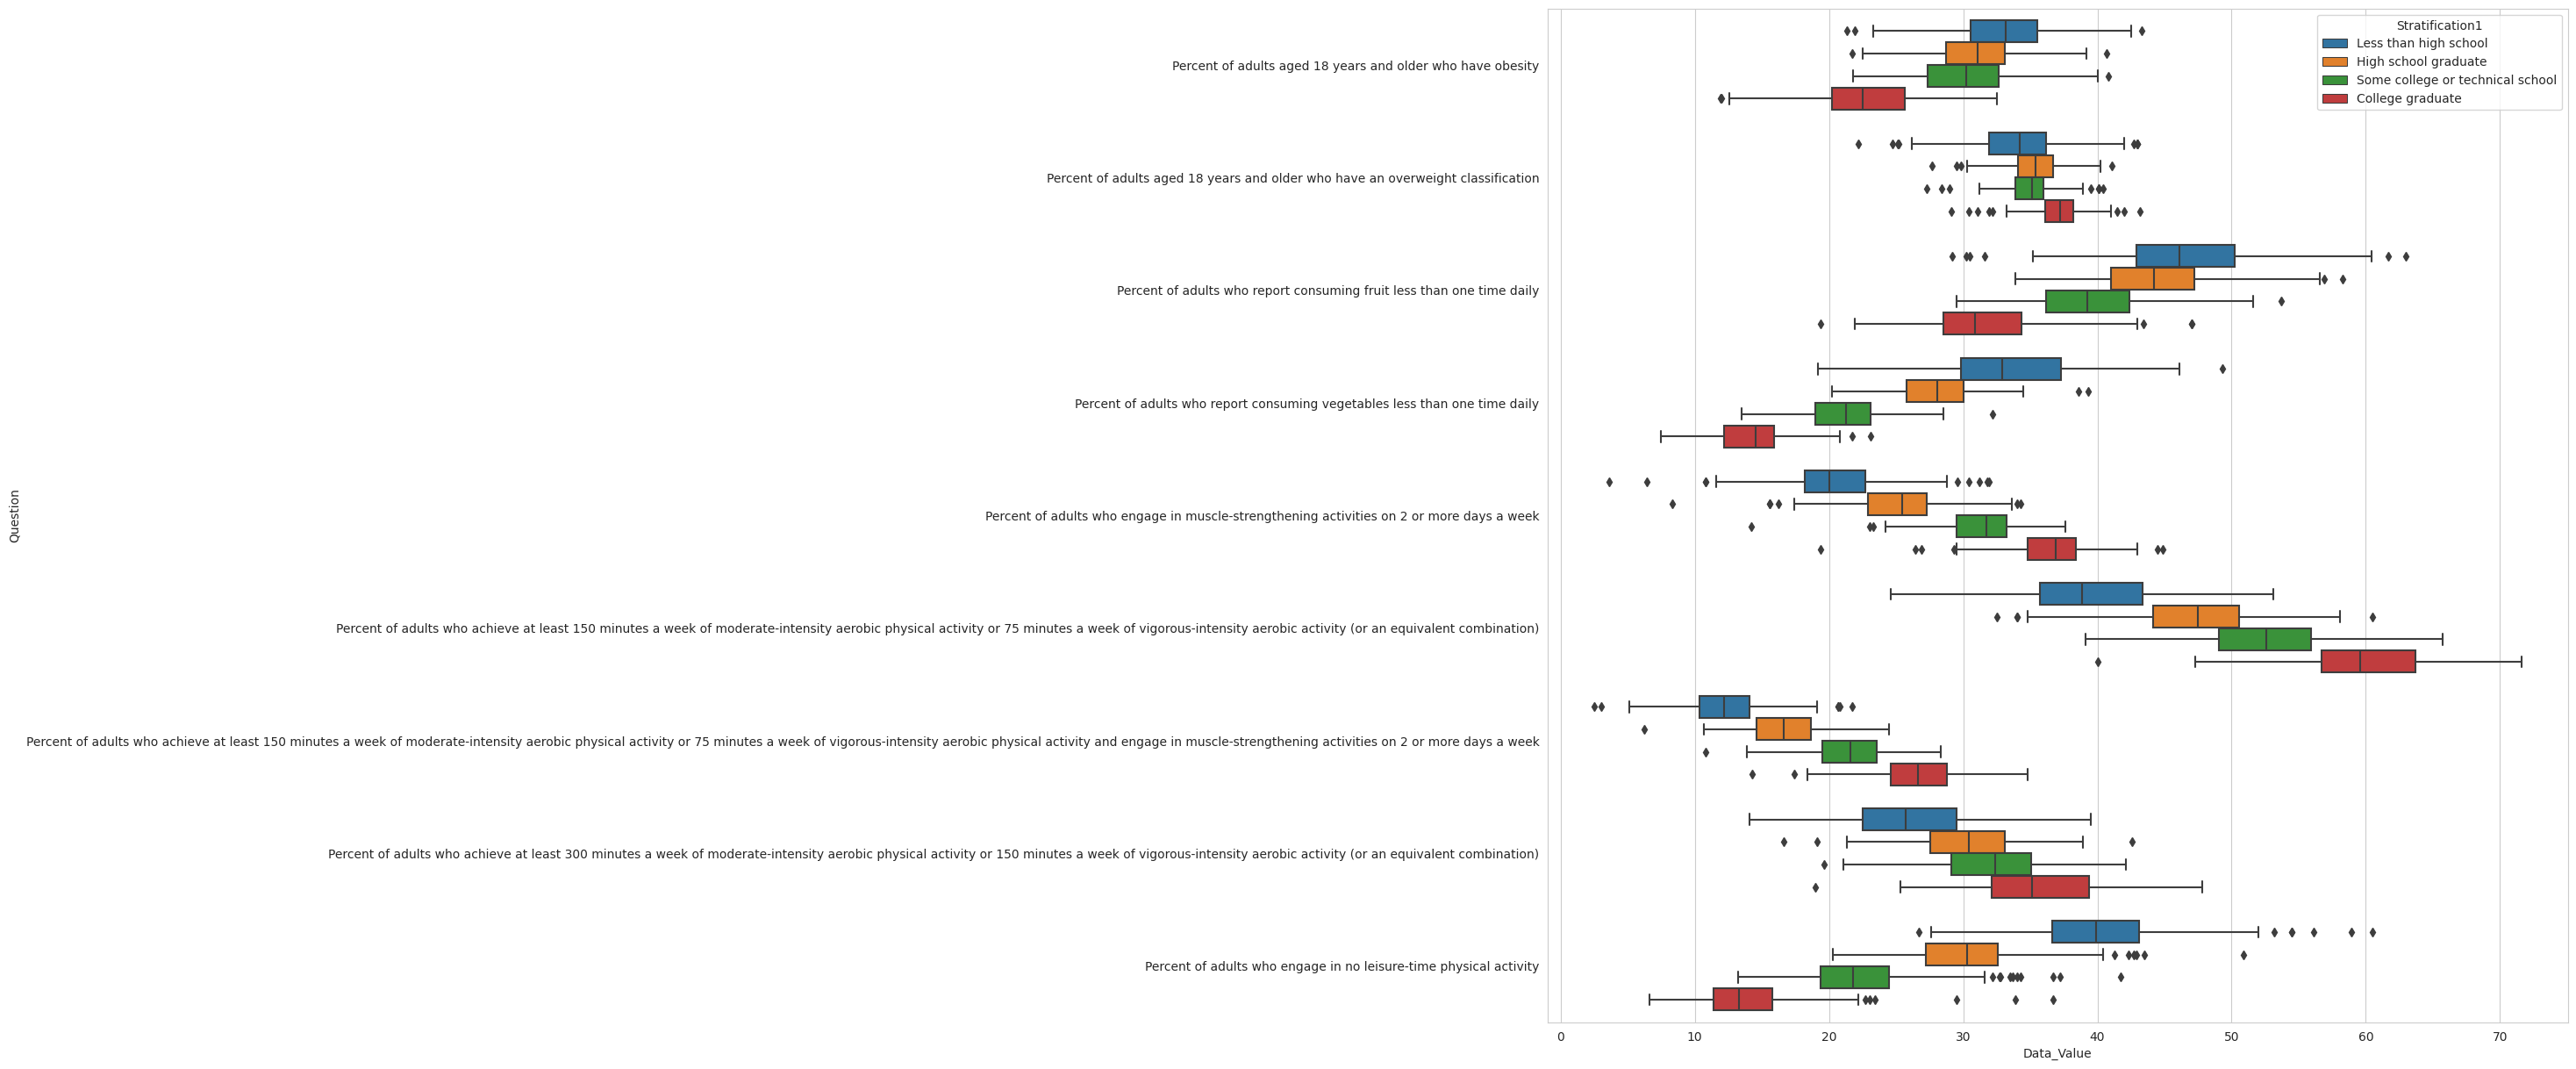

In [147]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.boxplot(data=data4, x='Data_Value', y='Question', hue='Stratification1', orient="h", ax=ax)

<Axes: xlabel='Data_Value', ylabel='Stratification1'>

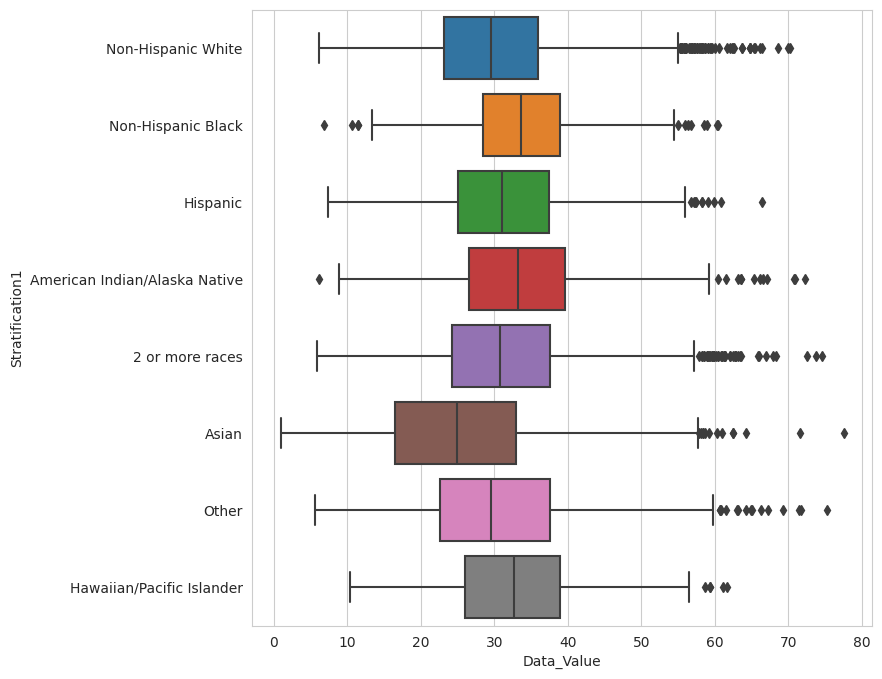

In [148]:
fig, ax = plt.subplots(figsize=(8,8))
sns.boxplot(data=data5, y='Stratification1', x='Data_Value', ax=ax)

<Axes: xlabel='Data_Value', ylabel='Question'>

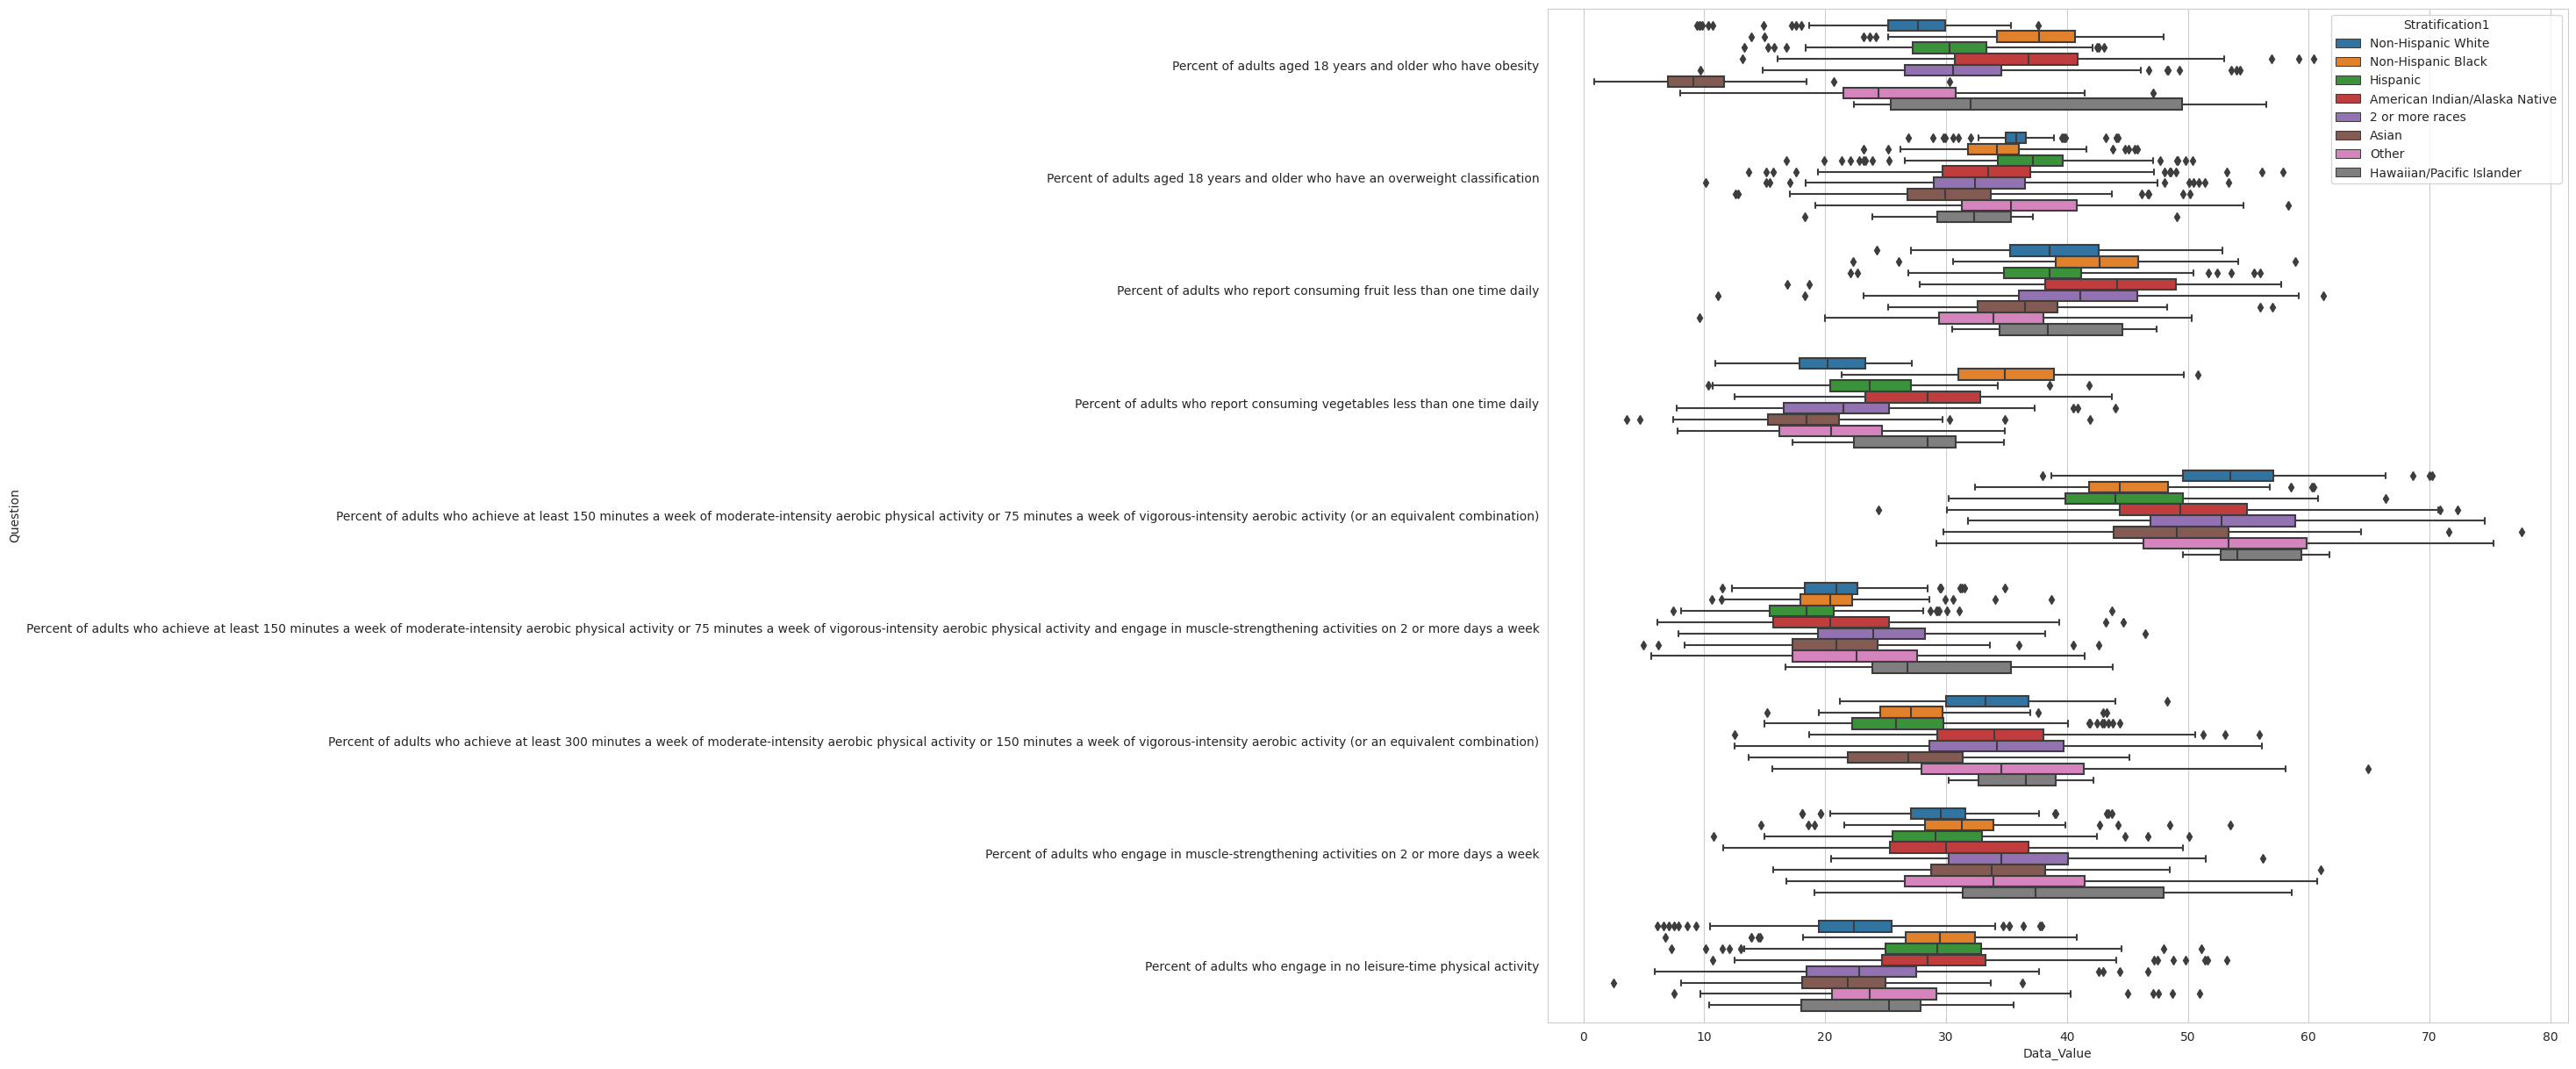

In [149]:
fig, ax = plt.subplots(figsize=(15, 15))
sns.set_style("whitegrid")
sns.boxplot(data=data5, x='Data_Value', y='Question', hue='Stratification1', ax=ax)

## Data Pre-Processing
Now we will proceed to the Data Preprocessing Step.

In [150]:
# To model our data, we will keep only the following columns

columns_to_keep = ['Question', 'StratificationCategory1', 'Data_Value', 'Stratification1']

# Create a new DataFrame with only the selected columns
data1 = data1[columns_to_keep]  # Income
data2 = data2[columns_to_keep]  # Gender
data3 = data3[columns_to_keep]  # Age
data4 = data4[columns_to_keep]  # Education
data5 = data5[columns_to_keep]  # Race/Ethnicity
data6 = data6[columns_to_keep]  # Total

In [151]:
data1 = data1.drop('StratificationCategory1', axis=1)
data2 = data2.drop('StratificationCategory1', axis=1)
data3 = data3.drop('StratificationCategory1', axis=1)
data4 = data4.drop('StratificationCategory1', axis=1)
data5 = data5.drop('StratificationCategory1', axis=1)
data6 = data6.drop('StratificationCategory1', axis=1)

In [152]:
# Define a mapping from question text to question number
question_mapping = {
    'Percent of adults aged 18 years and older who have obesity': 0,
    'Percent of adults aged 18 years and older who have an overweight classification': 1,
    'Percent of adults who report consuming fruit less than one time daily': 2,
    'Percent of adults who report consuming vegetables less than one time daily': 3,
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 4,
    'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-...': 5,
    'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)': 6,
    'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week': 7,
    'Percent of adults who engage in no leisure-time physical activity': 8,
}

# Create a new column with the question numbers
data1['Question_Num'] = data1['Question'].replace(question_mapping)

# Create the new columns based on the conditions
data1['obesity'] = data1['Question_Num'].apply(lambda x: 1 if x in [0, 1] else 0)
data1['food'] = data1['Question_Num'].apply(lambda x: 1 if x in [2, 3] else 0)
data1['exercise'] = data1['Question_Num'].apply(lambda x: 0.5 if x in [4, 5] else (1 if x == 6 else 0))
data1['activity'] = data1['Question_Num'].apply(lambda x: 1 if x == 7 else (-1 if x == 8 else 0))

# Display the first few rows of the modified dataframe
data1.head()

,Question,Data_Value,Stratification1,Question_Num,obesity,food,exercise,activity
13,Percent of adults aged 18 years and older who ...,38.5,"Less than $15,000",0,1,0,0.0,0
14,Percent of adults aged 18 years and older who ...,34.8,"$15,000 - $24,999",0,1,0,0.0,0
15,Percent of adults aged 18 years and older who ...,35.8,"$25,000 - $34,999",0,1,0,0.0,0
16,Percent of adults aged 18 years and older who ...,32.3,"$35,000 - $49,999",0,1,0,0.0,0
17,Percent of adults aged 18 years and older who ...,34.1,"$50,000 - $74,999",0,1,0,0.0,0


In [153]:
# drop the Question and Question_Num columns
data1 = data1.drop(['Question', 'Question_Num'], axis=1)
data1.head()

,Data_Value,Stratification1,obesity,food,exercise,activity
13,38.5,"Less than $15,000",1,0,0.0,0
14,34.8,"$15,000 - $24,999",1,0,0.0,0
15,35.8,"$25,000 - $34,999",1,0,0.0,0
16,32.3,"$35,000 - $49,999",1,0,0.0,0
17,34.1,"$50,000 - $74,999",1,0,0.0,0


In [154]:
# drop rows with stratification1 = Data not reported
data1 = data1[data1['Stratification1'] != 'Data not reported']

## Training The Model

#### Model-1: We have taken Income as our Stratification. So the dataset consist of records of the surveys on the 5 categories of Income, which are LabelEncoded as below.


In [155]:
#  encode Stratifcation1 using LabelEncoder with the following mapping
# 'Less than $15,000': 0, '$15,000 - $24,999': 1, '$25,000 - $34,999': 2, '$35,000 - $49,999': 3, '$50,000 - $74,999': 4, '$75,000 or greater': 5

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
order = {'Less than $15,000': 0, '$15,000 - $24,999': 1, '$25,000 - $34,999': 2, '$35,000 - $49,999': 3, '$50,000 - $74,999': 4, '$75,000 or greater': 5}
data1['Stratification1'] = data1['Stratification1'].map(order)
data1.head()

,Data_Value,Stratification1,obesity,food,exercise,activity
13,38.5,0,1,0,0.0,0
14,34.8,1,1,0,0.0,0
15,35.8,2,1,0,0.0,0
16,32.3,3,1,0,0.0,0
17,34.1,4,1,0,0.0,0


In [156]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Define the features and the target variable
features = ['Stratification1', 'obesity', 'food', 'exercise', 'activity']
target = 'Data_Value'

# Separate the features and the target variable
X = data1[features]
y = data1[target]

# Adding interaction terms between different pairs of features
interaction_features = [
    ('Stratification1', 'obesity'),
    ('Stratification1', 'food'),
    ('Stratification1', 'exercise'),
    ('Stratification1', 'activity'),
    ('obesity', 'food'),
    ('obesity', 'exercise'),
    ('obesity', 'activity'),
    ('food', 'exercise'),
    ('food', 'activity'),
    ('exercise', 'activity')
]

for feature1, feature2 in interaction_features:
    X[f'{feature1}_x_{feature2}'] = X[feature1] * X[feature2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
model = RandomForestRegressor(random_state=42)

# Create a pipeline with feature scaling and the model
pipeline = make_pipeline(StandardScaler(), model)

# Train the model
pipeline.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = pipeline.predict(X_test)

# Calculate regression metrics to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

MAE: 4.5010621525829775
MSE: 33.07970311133308
R² Score: 0.656298668831353


In [157]:
def predict_data_value():
    income = int(input('Enter your income: '))
    obesity = int(input('Enter your obesity: '))
    food = int(input('Enter your food: '))
    exercise = int(input('Enter your exercise: '))
    activity = int(input('Enter your activity: '))

    # create a dataframe with the user input
    user_input = pd.DataFrame([[income, obesity, food, exercise, activity]], columns=['Stratification1', 'obesity', 'food', 'exercise', 'activity'])
    # add interaction terms
    for feature1, feature2 in interaction_features:
        user_input[f'{feature1}_x_{feature2}'] = user_input[feature1] * user_input[feature2]

    # make a prediction using the pipeline
    prediction = pipeline.predict(user_input)

    # print the prediction
    print(f'Your predicted Data Value for is {prediction[0]:.1f}')

In [158]:
predict_data_value()

Enter your income: 1
Enter your obesity: 0 
Enter your food: 1
Enter your exercise: 0
Enter your activity: 0
Your predicted Data Value for is 35.4


#### Model-2: We have taken Age as our Stratification. So the dataset consist of records of the surveys on the six categories of Ages, which are LabelEncoded as below.

In [159]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
order = {'18 - 24': 0, '25 - 34': 1, '35 - 44': 2, '45 - 54': 3, '55 - 64': 4, '65 or older': 5}
data3['Stratification1'] = data3['Stratification1'].map(order)

In [160]:
# Create a new column with the question numbers
# We Pre-process the data as before.
data3['Question_Num'] = data3['Question'].replace(question_mapping)

# Create the new columns based on the conditions
data3['obesity'] = data3['Question_Num'].apply(lambda x: 1 if x in [0, 1] else 0)
data3['food'] = data3['Question_Num'].apply(lambda x: 1 if x in [2, 3] else 0)
data3['exercise'] = data3['Question_Num'].apply(lambda x: 0.5 if x in [4, 5] else (1 if x == 6 else 0))
data3['activity'] = data3['Question_Num'].apply(lambda x: 1 if x == 7 else (-1 if x == 8 else 0))

# Display the first few rows of the modified dataframe
data3.head()

,Question,Data_Value,Stratification1,Question_Num,obesity,food,exercise,activity
7,Percent of adults aged 18 years and older who ...,16.3,0,0,1,0,0.0,0
8,Percent of adults aged 18 years and older who ...,35.2,1,0,1,0,0.0,0
9,Percent of adults aged 18 years and older who ...,35.5,2,0,1,0,0.0,0
10,Percent of adults aged 18 years and older who ...,38.0,3,0,1,0,0.0,0
11,Percent of adults aged 18 years and older who ...,36.4,4,0,1,0,0.0,0


In [161]:
# drop rows with stratification1 = Data not reported
data3 = data3[data3['Stratification1'] != 'Data not reported']
data3 = data3.dropna()

In [162]:
# Define the features and the target variable
features = ['Stratification1', 'obesity', 'food', 'exercise', 'activity']
target = 'Data_Value'

# Separate the features and the target variable
X = data3[features]
y = data3[target]

# Adding interaction terms between different pairs of features
interaction_features = [
    ('Stratification1', 'obesity'),
    ('Stratification1', 'food'),
    ('Stratification1', 'exercise'),
    ('Stratification1', 'activity'),
    ('obesity', 'food'),
    ('obesity', 'exercise'),
    ('obesity', 'activity'),
    ('food', 'exercise'),
    ('food', 'activity'),
    ('exercise', 'activity')
]

for feature1, feature2 in interaction_features:
    X[f'{feature1}_x_{feature2}'] = X[feature1] * X[feature2]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
model = RandomForestRegressor(random_state=42)

# Create a pipeline with feature scaling and the model
pipeline = make_pipeline(StandardScaler(), model)

# Train the model
pipeline.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = pipeline.predict(X_test)

# Calculate regression metrics to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')

<ipython-input-162-23499159a44f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{feature1}_x_{feature2}'] = X[feature1] * X[feature2]
<ipython-input-162-23499159a44f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[f'{feature1}_x_{feature2}'] = X[feature1] * X[feature2]


MAE: 4.836498096826897
MSE: 39.78939392805772
R² Score: 0.6489557527061649


### Model-3: We have taken Race as our Stratification. So the dataset consist of records of the surveys on the six categories of Races, which are One-Hot Encoded as below.

In [164]:
# drop rows with stratification1 = Data not reported
data5 = data5[data5['Stratification1'] != 'Other']
data5 = data5[data5['Stratification1'] != '2 or more races']
data5 = data5.dropna()

In [165]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming data5 is your data frame
ohe = OneHotEncoder(sparse=False)

# Encode 'Stratification1' using OneHotEncoder
stratification1_encoded = ohe.fit_transform(data5[['Stratification1']])
stratification1_encoded = pd.DataFrame(stratification1_encoded, columns=ohe.get_feature_names_out(['Stratification1']), index=data5.index)

# Drop the original column
data5 = data5.drop('Stratification1', axis=1)

# Concatenate the original DataFrame with the encoded DataFrame
data5 = pd.concat([data5, stratification1_encoded], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [166]:
# We Pre-process the data as before.
data5['Question_Num'] = data5['Question'].replace(question_mapping)

# Create the new columns based on the conditions
data5['obesity'] = data5['Question_Num'].apply(lambda x: 1 if x in [0, 1] else 0)
data5['food'] = data5['Question_Num'].apply(lambda x: 1 if x in [2, 3] else 0)
data5['exercise'] = data5['Question_Num'].apply(lambda x: 0.5 if x in [4, 5] else (1 if x == 6 else 0))
data5['activity'] = data5['Question_Num'].apply(lambda x: 1 if x == 7 else (-1 if x == 8 else 0))

# Display the first few rows of the modified dataframe
data5.head()

,Question,Data_Value,Stratification1_American Indian/Alaska Native,Stratification1_Asian,Stratification1_Hawaiian/Pacific Islander,Stratification1_Hispanic,Stratification1_Non-Hispanic Black,Stratification1_Non-Hispanic White,Question_Num,obesity,food,exercise,activity
20,Percent of adults aged 18 years and older who ...,29.8,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,0.0,0
21,Percent of adults aged 18 years and older who ...,40.1,0.0,0.0,0.0,0.0,1.0,0.0,0,1,0,0.0,0
22,Percent of adults aged 18 years and older who ...,28.6,0.0,0.0,0.0,1.0,0.0,0.0,0,1,0,0.0,0
25,Percent of adults aged 18 years and older who ...,32.9,1.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0.0,0
48,Percent of adults aged 18 years and older who ...,36.4,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0.0,0


In [167]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the features and the target variable
features = [
    'obesity', 'food', 'exercise', 'activity',
    'Stratification1_American Indian/Alaska Native',
    'Stratification1_Asian',
    'Stratification1_Hawaiian/Pacific Islander',
    'Stratification1_Hispanic',
    'Stratification1_Non-Hispanic Black',
    'Stratification1_Non-Hispanic White']
target = 'Data_Value'

# Separate the features and the target variable
X = data5[features]
y = data5[target]

# Split the data5 into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest regressor
model_rf = RandomForestRegressor(random_state=42)

# Train the Random Forest regressor
model_rf.fit(X_train, y_train)

# Predict the target variable on the testing set
y_pred = model_rf.predict(X_test)

# Calculate regression metrics to evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R² Score: {r2}')


MAE: 5.603060774636126
MSE: 51.04855947664578
R² Score: 0.532404894867998
